# **Impacto de las Condiciones Preexistentes y Factores de Riesgo en la Mortalidad y Hospitalización de Pacientes con COVID-19**

El objetivo general de este proyecto es investigar cómo las condiciones de salud preexistentes influyen en la probabilidad de mortalidad y contagio en pacientes con COVID-19 y qué factores de riesgo están asociados a la hospitalización. Esto permitirá identificar patrones y factores críticos que pueden guiar las políticas de salud pública y las estrategias de intervención.



## **Descripción del Dataset**

El dataset fue proporcionado por el gobierno mexicano ([enlace](link)). Contiene una gran cantidad de información anonimizada sobre pacientes, incluyendo condiciones preexistentes. El dataset crudo consta de **21 características únicas** y **1,048,576 pacientes únicos**.

En las características Booleanas:
- **1** significa "sí".
- **2** significa "no".
- Los valores **97**,**98** y **99** representan datos faltantes.

### **Descripción de las columnas contenidas en el archivo csv:**

- **sex**: Género del paciente. 1 para femenino y 2 para masculino.
- **age**: Edad del paciente.
- **classification**: Resultados de la prueba de COVID. Los valores 1-3 indican que el paciente fue diagnosticado con COVID en diferentes grados. Un valor de 4 o superior indica que el paciente no es portador de COVID o que la prueba fue inconclusa.
- **patient type**: Tipo de atención recibida por el paciente. 1 significa que fue dado de alta a su casa, y 2 indica que fue hospitalizado.
- **pneumonia**: Indica si el paciente ya tiene inflamación de los sacos de aire.
- **pregnancy**: Indica si el paciente está embarazada o no.
- **diabetes**: Indica si el paciente tiene diabetes.
- **copd**: Indica si el paciente tiene Enfermedad Pulmonar Obstructiva Crónica (EPOC).
- **asthma**: Indica si el paciente tiene asma.
- **inmsupr**: Indica si el paciente está inmunosuprimido.
- **hypertension**: Indica si el paciente tiene hipertensión.
- **cardiovascular**: Indica si el paciente tiene una enfermedad relacionada con el corazón o los vasos sanguíneos.
- **renal chronic**: Indica si el paciente tiene una enfermedad renal crónica.
- **other disease**: Indica si el paciente tiene alguna otra enfermedad.
- **obesity**: Indica si el paciente tiene obesidad.
- **tobacco**: Indica si el paciente es usuario de tabaco.
- **usmr**: Indica si el paciente fue tratado en unidades médicas de primer, segundo o tercer nivel.
- **medical unit**: Tipo de institución del Sistema Nacional de Salud que brindó la atención.
- **intubed**: Indica si el paciente fue conectado a un ventilador.
- **icu**: Indica si el paciente fue admitido en una Unidad de Cuidados Intensivos (UCI).
- **date died**: Si el paciente falleció, indica la fecha de defunción; de lo contrario, aparece el valor **9999-99-99**.

#**Limpieza, organización y estandarización de los datos**

In [141]:
#Importar librerias necesarias
from IPython.display import display,Markdown # Para mostrar múltiples resultados en una sola celda.
import pandas as pd
import numpy as np

In [142]:
#Conectamos con google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [143]:
# Generamos una variable con la ruta parcial.
dataset= "/content/drive/MyDrive/datasetpro/"
# Declaracion de variables generales.
df = pd.DataFrame()
df_1= pd.DataFrame()

In [144]:
try:
  # Cargamos el archivo, para su principal lectura y procesamiento de datos.
  df = pd.read_csv(dataset + 'Covid Data.csv')
  display(df)
except Exception as e:
  print("Algo ocurrio con la lectura del archivo verifica la ruta")
  print(f'Error: {e}')
else:
  print("Lectura finalizada")

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97


Lectura finalizada


In [145]:
def resumen_dataframe(df):
    """
    Muestra un resumen general del DataFrame incluyendo la cantidad de filas y columnas,
    cantidad y porcentaje de datos nulos, valores únicos y tipos de datos por columna.

    Parámetros:
    df (DataFrame): El DataFrame a analizar.

    Retorna:
    None
    """
    print("="*60)
    print("RESUMEN GENERAL DEL DATAFRAME")
    print("="*60)
    print(f"Dimensiones del DataFrame: {df.shape[0]} filas y {df.shape[1]} columnas")
    print("-"*60)

    print("Cantidad de datos nulos por columna:")
    nulos = df.isnull().sum()
    porcentaje_nulos = (nulos / df.shape[0]) * 100
    nulos_df = pd.DataFrame({'Nulos': nulos, 'Porcentaje (%)': porcentaje_nulos})
    print(nulos_df)
    print("-"*60)

    print("Valores únicos por columna:")
    print(df.nunique())
    print("-"*60)

    print("Tipos de datos por columna:")
    print(df.dtypes)
    print("-"*60)

# Llamada a la función con un DataFrame de ejemplo
resumen_dataframe(df)


RESUMEN GENERAL DEL DATAFRAME
Dimensiones del DataFrame: 1048575 filas y 21 columnas
------------------------------------------------------------
Cantidad de datos nulos por columna:
                      Nulos  Porcentaje (%)
USMER                     0             0.0
MEDICAL_UNIT              0             0.0
SEX                       0             0.0
PATIENT_TYPE              0             0.0
DATE_DIED                 0             0.0
INTUBED                   0             0.0
PNEUMONIA                 0             0.0
AGE                       0             0.0
PREGNANT                  0             0.0
DIABETES                  0             0.0
COPD                      0             0.0
ASTHMA                    0             0.0
INMSUPR                   0             0.0
HIPERTENSION              0             0.0
OTHER_DISEASE             0             0.0
CARDIOVASCULAR            0             0.0
OBESITY                   0             0.0
RENAL_CHRONIC            

In [146]:
#Creamos una copia para poder recuperar la información original en dado caso de necesitarlo
df_1 = df.copy()
df_1.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [147]:
# Convertir nombres de columnas a snake_case
df_1.columns = df.columns.str.lower().str.replace(' ', '_')
df_1.head()

,usmer,medical_unit,sex,patient_type,date_died,intubed,pneumonia,age,pregnant,diabetes,...,asthma,inmsupr,hipertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,clasiffication_final,icu
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


Dadas las caracteristicas del Dataset pudimos notar que no habia valores NaN ya que estos se habian sustituido por valores como 97,98 y 99, esto nos podria causar ciertos problemas al hacer calculos estadisticos que podrian presentar sesgo dentro de los cálculos, por lo que procederemos a cambiar estos valores por NaN para después pasarlos a un valor 0.


In [148]:
# Reemplazar los valores 97 y 99 por NaN en todas las columnas
df_1.replace([97, 98, 99], np.nan, inplace=True)

# En el análisis 0 tiene sentido para los datos faltantes
df_1.fillna(0, inplace=True)

# Reemplazar '9999-99-99' con NaT antes de convertir
df_1['date_died'].replace('9999-99-99', np.nan, inplace=True)
#Validar que los datos manejados solo sean de tipo date
df_1['date_died'] = pd.to_datetime(df_1['date_died'], errors='coerce')

datos_nulos={
    'date_died': pd.to_datetime(np.random.uniform(df_1['date_died'].min().value, df_1['date_died'].max().value)).normalize()
}

df_1 = df_1.astype(diccionario_de_conversion)
df_1.fillna(datos_nulos,inplace=True)

#explorando el dataset
resumen_dataframe(df_1)

RESUMEN GENERAL DEL DATAFRAME
Dimensiones del DataFrame: 1048575 filas y 21 columnas
------------------------------------------------------------
Cantidad de datos nulos por columna:
                      Nulos  Porcentaje (%)
usmer                     0             0.0
medical_unit              0             0.0
sex                       0             0.0
patient_type              0             0.0
date_died                 0             0.0
intubed                   0             0.0
pneumonia                 0             0.0
age                       0             0.0
pregnant                  0             0.0
diabetes                  0             0.0
copd                      0             0.0
asthma                    0             0.0
inmsupr                   0             0.0
hipertension              0             0.0
other_disease             0             0.0
cardiovascular            0             0.0
obesity                   0             0.0
renal_chronic            

In [154]:
# Detectar valores duplicados
df_1.drop_duplicates(inplace=True)
resumen_dataframe(df_1)

RESUMEN GENERAL DEL DATAFRAME
Dimensiones del DataFrame: 213912 filas y 21 columnas
------------------------------------------------------------
Cantidad de datos nulos por columna:
                      Nulos  Porcentaje (%)
usmer                     0             0.0
medical_unit              0             0.0
sex                       0             0.0
patient_type              0             0.0
date_died                 0             0.0
intubed                   0             0.0
pneumonia                 0             0.0
age                       0             0.0
pregnant                  0             0.0
diabetes                  0             0.0
copd                      0             0.0
asthma                    0             0.0
inmsupr                   0             0.0
hipertension              0             0.0
other_disease             0             0.0
cardiovascular            0             0.0
obesity                   0             0.0
renal_chronic             

In [155]:
#Eliminar columnas no necesarias del DataFrame y guardarlo en una nueva variable
df_1 = df_1.drop(columns=['usmer', 'medical_unit'])
df_1.head(10)

,sex,patient_type,date_died,intubed,pneumonia,age,pregnant,diabetes,copd,asthma,inmsupr,hipertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,clasiffication_final,icu
0,1,1,2020-03-05,0,1,65,2,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,0
1,2,1,2020-03-06,0,1,72,0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,5,0
2,2,2,2020-09-06,1,2,55,0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2
3,1,1,2020-12-06,0,2,53,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,0
4,2,1,2021-03-13,0,2,68,0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,0
5,1,2,2021-03-13,2,1,40,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2
6,1,1,2021-03-13,0,2,64,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,0
7,1,1,2021-03-13,0,1,64,2,1.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,3,0
8,1,2,2021-03-13,2,2,37,2,1.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,3,2
9,1,2,2021-03-13,2,2,25,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2


In [156]:
df_1.columns.tolist()

['sex',
 'patient_type',
 'date_died',
 'intubed',
 'pneumonia',
 'age',
 'pregnant',
 'diabetes',
 'copd',
 'asthma',
 'inmsupr',
 'hipertension',
 'other_disease',
 'cardiovascular',
 'obesity',
 'renal_chronic',
 'tobacco',
 'clasiffication_final',
 'icu']

In [157]:
# Mapear la variable clasificación
def map_classification(x):
  if x >= 4:
    return 'Negativo o Inconcluso'
  elif x == 1:
    return 'Positivo - Leve'
  elif x == 2:
    return 'Positivo - Moderado'
  elif x == 3:
    return 'Positivo - Grave'  # No cambia el valor 3
  return x

df_1['clasiffication_final'] = df_1['clasiffication_final'].apply(map_classification)

In [158]:
def mapear_variables(df):
    # Mapeo para la variable 'sex'
    if df['sex'].dtype == 'int64':  # Verifica si los valores son numéricos
        df['sex'] = df['sex'].map({1: 'Femenino', 2: 'Masculino'})

    # Mapeo para la variable 'patient_type'
    if df['patient_type'].dtype == 'int64':  # Verifica si los valores son numéricos
        df['patient_type'] = df['patient_type'].map({1: 'Alta', 2: 'Hospitalizado'})

    return df

# Aplicar la función al DataFrame solo una vez
df_1 = mapear_variables(df_1)
df_1.head()


,sex,patient_type,date_died,intubed,pneumonia,age,pregnant,diabetes,copd,asthma,inmsupr,hipertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,clasiffication_final,icu
0,Femenino,Alta,2020-03-05,0,1,65,2,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,Positivo - Grave,0
1,Masculino,Alta,2020-03-06,0,1,72,0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,Negativo o Inconcluso,0
2,Masculino,Hospitalizado,2020-09-06,1,2,55,0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,Positivo - Grave,2
3,Femenino,Alta,2020-12-06,0,2,53,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,Negativo o Inconcluso,0
4,Masculino,Alta,2021-03-13,0,2,68,0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,Positivo - Grave,0


In [159]:
def mapeo_int(df):
# Mapeo para las variables binarias (1 = Si, 2 = No)
  binarias = ['intubed','pneumonia','pregnant','diabetes','copd','asthma','inmsupr','hipertension',
                  'other_disease','cardiovascular','obesity','renal_chronic','tobacco']

  for col in binarias:
      df[col] = pd.to_numeric(df[col], errors='coerce')  # Convierte a numérico, reemplaza errores con NaN
      df[col] = df[col].fillna(0).astype(int)  # Reemplaza NaN con 0 y convierte a int
      df[col] = df[col].map({0: 'Desconocido', 1: 'Sí', 2: 'No'})

  return df
  # Aplicar la función al DataFrame
df_1 = mapeo_int(df_1)
df_1.head()

,sex,patient_type,date_died,intubed,pneumonia,age,pregnant,diabetes,copd,asthma,inmsupr,hipertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,clasiffication_final,icu
0,Femenino,Alta,2020-03-05,Desconocido,Sí,65,No,No,No,No,No,Sí,No,No,No,No,No,Positivo - Grave,0
1,Masculino,Alta,2020-03-06,Desconocido,Sí,72,Desconocido,No,No,No,No,Sí,No,No,Sí,Sí,No,Negativo o Inconcluso,0
2,Masculino,Hospitalizado,2020-09-06,Sí,No,55,Desconocido,Sí,No,No,No,No,No,No,No,No,No,Positivo - Grave,2
3,Femenino,Alta,2020-12-06,Desconocido,No,53,No,No,No,No,No,No,No,No,No,No,No,Negativo o Inconcluso,0
4,Masculino,Alta,2021-03-13,Desconocido,No,68,Desconocido,Sí,No,No,No,Sí,No,No,No,No,No,Positivo - Grave,0


In [160]:
resumen_dataframe(df_1)

RESUMEN GENERAL DEL DATAFRAME
Dimensiones del DataFrame: 213912 filas y 19 columnas
------------------------------------------------------------
Cantidad de datos nulos por columna:
                      Nulos  Porcentaje (%)
sex                       0             0.0
patient_type              0             0.0
date_died                 0             0.0
intubed                   0             0.0
pneumonia                 0             0.0
age                       0             0.0
pregnant                  0             0.0
diabetes                  0             0.0
copd                      0             0.0
asthma                    0             0.0
inmsupr                   0             0.0
hipertension              0             0.0
other_disease             0             0.0
cardiovascular            0             0.0
obesity                   0             0.0
renal_chronic             0             0.0
tobacco                   0             0.0
clasiffication_final      

# Análisis Exploratorio de los Datos

In [161]:
#funcion que calcula las estadisticas de las columnas.
def calcular_estadisticas(df, columna):
    print(f"Estadísticas de la columna {columna}:")
    print(f"Media: {df[columna].mean()}")
    print(f"Desviación estándar: {df[columna].std()}")
    print(f"Mínimo: {df[columna].min()}")
    print(f"Máximo: {df[columna].max()}")

calcular_estadisticas(df_1, 'age')


Estadísticas de la columna age:
Media: 51.78696847301694
Desviación estándar: 19.63103931349849
Mínimo: 0
Máximo: 121


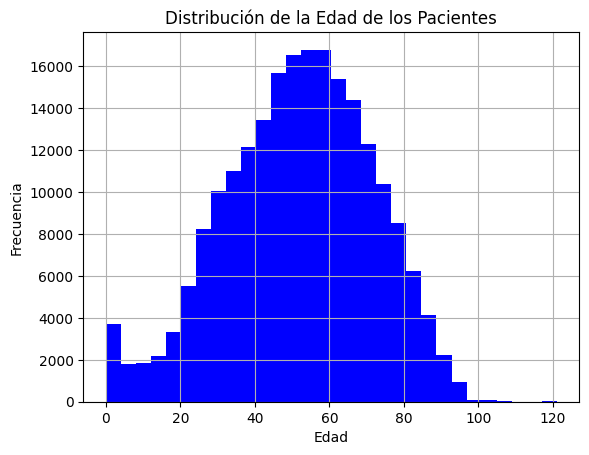

In [162]:
import matplotlib.pyplot as plt

# Histograma de la distribución de la edad
df_1['age'].hist(bins=30, color='blue')
plt.title('Distribución de la Edad de los Pacientes')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()


In [163]:
# Agrupar por género y contar el número de pacientes en cada grupo
conteo_genero = df_1.groupby('sex').size().reset_index(name='Conteo')

# Calcular la proporción de cada género
proporcion_genero = (df_1.groupby('sex').size() / len(df_1) * 100).reset_index(name='Proporción (%)')

# Unir ambos resultados en un solo DataFrame
resultado_genero = pd.merge(conteo_genero, proporcion_genero, on='sex')

# Renombrar la columna 'sex' a 'Género'
resultado_genero = resultado_genero.rename(columns={'sex': 'Sexo'})

# Mostrar el DataFrame con display()
display(resultado_genero)

,Sexo,Conteo,Proporción (%)
0,Femenino,99765,46.638337
1,Masculino,114147,53.361663


In [164]:
# Contar cuántos pacientes hay en cada grado de COVID (Positivo - Leve, Moderado, Grave)
covid_counts = df_1['clasiffication_final'].value_counts()

# Filtrar solo los diagnósticos de COVID (grados 1-3)
diagnosticos_covid = covid_counts[['Positivo - Leve', 'Positivo - Moderado', 'Positivo - Grave']]
# Convertir el conteo a un DataFrame para mejor presentación
diagnosticos_covid_df = pd.DataFrame(diagnosticos_covid).reset_index()
diagnosticos_covid_df.columns = ['Diagnóstico', 'Cantidad de Pacientes']


# Mostrar el DataFrame
display(diagnosticos_covid_df)


,Diagnóstico,Cantidad de Pacientes
0,Positivo - Leve,4672
1,Positivo - Moderado,1787
2,Positivo - Grave,89483


In [165]:
# Contar pacientes dados de alta y hospitalizados según su clasificación de COVID
clasificacion_pacientes = df_1.groupby(['patient_type', 'clasiffication_final']).size().reset_index(name='Cantidad de Pacientes')

# Renombrar columnas para mejor comprensión
clasificacion_pacientes.columns = ['Tipo de Atención', 'Clasificación de COVID', 'Cantidad de Pacientes']

# Mostrar el DataFrame con display
display(clasificacion_pacientes)


,Tipo de Atención,Clasificación de COVID,Cantidad de Pacientes
0,Alta,Negativo o Inconcluso,62470
1,Alta,Positivo - Grave,32112
2,Alta,Positivo - Leve,2789
3,Alta,Positivo - Moderado,166
4,Hospitalizado,Negativo o Inconcluso,55500
5,Hospitalizado,Positivo - Grave,57371
6,Hospitalizado,Positivo - Leve,1883
7,Hospitalizado,Positivo - Moderado,1621


In [166]:
# Contar cuántos pacientes fueron hospitalizados y cuántos fueron enviados a casa
atencion_counts = df_1['patient_type'].value_counts()
atencion_counts_df = pd.DataFrame(atencion_counts).reset_index()
atencion_counts_df.columns = ['Tipo de Atención', 'Cantidad de Pacientes']

# Mostrar el DataFrame
display(atencion_counts_df)

,Tipo de Atención,Cantidad de Pacientes
0,Hospitalizado,116375
1,Alta,97537


In [167]:
# Filtrar los pacientes diagnosticados con COVID (Positivo - Leve, Moderado, Grave)
covid_diagnosticados = df_1[df_1['clasiffication_final'].isin(['Positivo - Leve', 'Positivo - Moderado', 'Positivo - Grave'])]

# Calcular la cantidad de pacientes con neumonía dentro del grupo de diagnosticados con COVID
pacientes_con_neumonia = covid_diagnosticados[covid_diagnosticados['pneumonia'] == 'Sí'].shape[0]

# Calcular el total de pacientes diagnosticados con COVID
total_covid_diagnosticados = covid_diagnosticados.shape[0]

# Calcular el porcentaje
porcentaje_con_neumonia = (pacientes_con_neumonia / total_covid_diagnosticados) * 100

# Mostrar el resultado
print(f"Porcentaje de pacientes diagnosticados con COVID que ya tenían neumonía: {porcentaje_con_neumonia:.2f}%")


Porcentaje de pacientes diagnosticados con COVID que ya tenían neumonía: 50.43%


In [168]:
# Calcular el número total de pacientes en el dataset
total_pacientes = df_1.shape[0]

# Calcular el número de pacientes embarazadas (asumiendo que 'Sí' indica embarazo)
pacientes_embarazadas = df_1[df_1['pregnant'] == 'Sí'].shape[0]

# Calcular el porcentaje de pacientes embarazadas
porcentaje_embarazadas = (pacientes_embarazadas / total_pacientes) * 100

# Mostrar el resultado utilizando display() para una mejor visualización
print(f"Porcentaje de pacientes embarazadas en el dataset: {porcentaje_embarazadas:.2f}%")


Porcentaje de pacientes embarazadas en el dataset: 1.41%
